# Análisis predictivo sobre selección de marca

A continuación realizaremos una análisis **predictivo** para obtener la probabilidad de compra de cierta marca.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [2]:
df_compras = pd.read_csv("datasets/purchase_data.csv")
# df_compras.head()
print(df_compras.columns)
df_compras[["ID", 'Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5' , 'Sex', 'Marital status', 'Age', 'Marital status', 'Age', 'Education', 'Income',
'Occupation']].head()

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


,ID,Price_1,Price_2,Price_3,Price_4,Price_5,Sex,Marital status,Age,Marital status,Age,Education,Income,Occupation
0,200000001,1.59,1.87,2.01,2.09,2.66,0,0,47,0,47,1,110866,1
1,200000001,1.51,1.89,1.99,2.09,2.66,0,0,47,0,47,1,110866,1
2,200000001,1.51,1.89,1.99,2.09,2.66,0,0,47,0,47,1,110866,1
3,200000001,1.52,1.89,1.98,2.09,2.66,0,0,47,0,47,1,110866,1
4,200000001,1.52,1.89,1.99,2.09,2.66,0,0,47,0,47,1,110866,1


Queremos analizar solamente las entradas en donde las personas hayan realizado efectivamente la compra de alguna barra de chocolate, es decir, debemos quedarnos con aquellas entradas donde *incidence == 1*.

In [3]:
df_compras_incidencia = df_compras[df_compras["Incidence"] == 1]
# df_compras_incidencia.head()

## Regresión Logística

Vamos a utilizar una [Regresión Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) para intentar predecir la marca que se comprará.

La Regresión logística es comunmente utilizada para estimar la probabilidad de que una observación/instancia pertenezca a cierta clase. En nuestro caso, lo que queremos es estimar la probabilidad de compra de alguna de las marcas de barra de chocolate por parte de cierto cliente, perteneciente a cierto segmento.

La ecuación en forma vectorizada de la regresión logística para determinar la probabilidad esta dada por,

$$ \hat{p} = h_{\theta}(\mathbf{x}) = \sigma \left( \theta^T\mathbf{x} \right)$$

Donde $\sigma$ representa la función *[sigmoide](https://en.wikipedia.org/wiki/Sigmoid_function)*, dada por,

$$ \sigma(t) = \frac{1}{1+exp(-t)} $$

Una vez que que se tiene la probabilidad de que una instancia pertenezca a la clase bajo estudio -**clase positiva**-, es fácil hacer una predicción para obtener $\hat{y}$. Por ejemplo, para un umbral del $50%$, la predicción nos daría,

$$ \hat{y}= \left\lbrace\begin{array}{c} 0~si~\hat{p}<0.5  \\ 1~si~\hat{p}\geq{0.5} \end{array}\right. $$

### Función de costo y entrenamiento

Necesitamos entrenar el modelo con nuestros datos para que, ante un nuevo cliente, intentemos predecir qué marca de barra de chocolate comprará. En el caso de regresión logística, la función de costo esta dada por,

$$ c(\theta)= \left\lbrace\begin{array}{c} -log(\hat{p})~si~y=1  \\ -log(1-\hat{p})~si~y=0 \end{array}\right. $$

Ya que queremos predecir la marca que se comprará, utilizaremos la columna *Brand* como variable a predecir. Por otro lado, utilizaremos las columnas de precio de 1 a 5 como *features*.

In [4]:
Y = df_compras_incidencia["Brand"]
# df_compras_incidencia.columns
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4','Price_5']
X = df_compras_incidencia[features]

In [5]:
lr_predictor_marca = LogisticRegression(solver = "sag", multi_class = "multinomial")
lr_predictor_marca.fit(X,Y)

LogisticRegression(multi_class='multinomial', solver='sag')

Analicemos qué hemos entrenado.

In [6]:
lr_predictor_marca.coef_

array([[-3.91593438,  0.65846917,  2.41781766,  0.70410046, -0.20207712],
       [ 1.27461932, -1.87985253, -0.21262628, -0.20633609,  0.58787715],
       [ 1.62414319,  0.56209123,  0.50072671,  1.03947788,  0.45273436],
       [ 0.57454488,  0.39559103, -1.40058599, -1.24623932,  0.24935844],
       [ 0.44262699,  0.26370109, -1.3053321 , -0.29100293, -1.08789283]])

Los coeficientes obtenidos luego de entrenar el algoritmo se encuentran dentro de un array de $5\times5$. Esto esta bien, ya que tenemos 5 marcas y el algoritmo intentará predecir, para una marca vs las otras cuatro, la probabilidad de que una observación pertenezca a la clase (marca en cuestión). Es decir, tenemos una marca o *clase* positiva, versus cuatro clases negativas. Por lo tanto, para la marca 1 tenemos 5 coeficientes, para la marca 2, otros cinco, etc.

Intenemos analizar qué nos están indicando estos coeficientes.

In [7]:
bc_coef = pd.DataFrame(lr_predictor_marca.coef_.T)
coeficientes = ["CM1","CM2","CM3","CM4","CM5"] #CM = Coeficiente Marca
bc_coef.columns = [coeficientes]
precios = ["P1","P2","P3","P4","P5"] #P = Precio
bc_coef.index = [precios]
bc_coef = bc_coef.round(2)
bc_coef


,CM1,CM2,CM3,CM4,CM5
P1,-3.92,1.27,1.62,0.57,0.44
P2,0.66,-1.88,0.56,0.40,0.26
P3,2.42,-0.21,0.50,-1.40,-1.31
P4,0.70,-0.21,1.04,-1.25,-0.29
P5,-0.20,0.59,0.45,0.25,-1.09


*Nota*: al hacer la traspuesta de la matriz de coeficientes lo que obtenemos son las *features* como filas y la salida en cada columna.

Recordemos que, **cuanto más alto el precio de una marca respecto de sí misma, menos probable es que sea comprada**, por lo cual tiene sentido que el coeficiente CM1 respecto de P1 sea negativo. Por otro lado, cuanto más se incrementen los precios de las marcas competidoras, más alta debería ser la probabilidad de que los clientes compren, por ejemplo, la marca 1 (aplica para las otras marcas también).

No obstante, debemos tener bien en claro que la probabilidades de selección de alguna marca en base a alguna observación están correlacionadas. Estos efectos se deben a lom que se conoce como *efectos de la propia marca* y *efectos cruzados*. Es decir, que los cambios en una marca, afectan su propia probabilidad de ser elegida, pero también la de las otras marcas.

### Análisis de *Elasticidad de precio* en marca 5

Supongamos que queremos analizar y/o predecir qué pasará con las ventas de barras de chocolate de la marca número 5 si cambiamos el precio de dicha marca o bien el precio de las marcas competidoras. El análisis se hace a través de la *elasticidad* de precio para la propia marca y las elasticidades *cruzadas*.

Según [wikipedia](https://es.wikipedia.org/wiki/Elasticidad_precio_de_la_demanda),
>   "*la elasticidad en el precio de la demanda es una medida utilizada en economía para mostrar el grado de respuesta, o elasticidad, de la cantidad demandada de un bien o servicio a los cambios en el precio de dicho bien o servicio*".

Ahora bien, desde el punto de vista de las probabilidades de compra de un producto, podemos definirla como,

> la elasticidad del precio de la probabilidad de compra es el porcentaje de cambio porcentual en la probabilidad de dicha compra y responde al cambio en $1\%$ del respectivo cambio de precio de la categoría o producto.

 price elasticity of purchase probability is the percentage change in purchase probability and response to a one percent change and the respective aggregate price for the product category.
#### Elasticidad propia


Vamos a analizar la elasticidad solamente sobre la marca 5 respecto de sí misma, es decir, cómo se podrían comportar los clientes ante la suba y baja de precios en esta marca.

In [8]:
#Rango de precios para las 5 marcas
df_compras_incidencia[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,1.384559,1.764717,2.006694,2.159658,2.654296
std,0.090944,0.181667,0.046200,0.093253,0.097724
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.570000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.180000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


##### Rango de precios

Vamos a generar un array con con diferentes valores para emular cambios de precios de la marca 5. La idea es examinar la probabilidad de compra de la marca 5 ante cambios en su precio de venta.

El precio de las otras marcas las mantendremos fijas utilizando sus valores medios.

In [9]:
rango_precios = np.arange(0.5, 3.5, 0.01) #rango de precios para marca 5
df_rango_precios = pd.DataFrame(index = np.arange(rango_precios.size))
df_rango_precios["Price_1"] = df_compras_incidencia["Price_1"].mean()
df_rango_precios["Price_2"] = df_compras_incidencia["Price_2"].mean()
df_rango_precios["Price_3"] = df_compras_incidencia["Price_3"].mean()
df_rango_precios["Price_4"] = df_compras_incidencia["Price_4"].mean()
df_rango_precios["Price_5"] = rango_precios
df_rango_precios

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [10]:
df_rango_precios[["Price_5"]].describe()

,Price_5
count,300.000000
mean,1.995000
std,0.867468
min,0.500000
25%,1.247500
50%,1.995000
75%,2.742500
max,3.490000


Escencialmente lo que vamos a hacer es **projectar las probabilidades de compra de la marca 5 para diferentes precios**.

Para esto, utilizaremos el modelo de regresión lineal que hemos entrenado previamente.

In [11]:
predictions_m5 = lr_predictor_marca.predict_proba(df_rango_precios) #predicciones marca 5
predictions_m5

array([[0.03290515, 0.02177654, 0.00543891, 0.02988807, 0.90999132],
       [0.03315987, 0.02211916, 0.00551702, 0.03025572, 0.90894823],
       [0.03341609, 0.02246684, 0.00559618, 0.03062744, 0.90789344],
       ...,
       [0.06881551, 0.47570474, 0.07953275, 0.23889474, 0.13705226],
       [0.06852992, 0.47748757, 0.07972301, 0.23897969, 0.13527982],
       [0.06824337, 0.47926208, 0.07991122, 0.23905721, 0.13352612]])

Recordemos que el método *[predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)* lo que hace es estimar las probabilidades para cada clase. En este caso, estará estimando las probabilidades de compra para cada marca en base al set de datos que le hemos pasado al modelo.

Ahora vamos a quedarnos con las probabilidades de compra solo de la marca 5. Guardaremos esto en una variable llamada *prob_compra_m5*.

In [12]:
prob_compra_m5 = predictions_m5[:,4]
prob_compra_m5[:50]

array([0.90999132, 0.90894823, 0.90789344, 0.90682685, 0.90574833,
       0.90465779, 0.9035551 , 0.90244015, 0.90131284, 0.90017305,
       0.89902067, 0.89785559, 0.89667768, 0.89548684, 0.89428296,
       0.89306592, 0.89183561, 0.8905919 , 0.8893347 , 0.88806388,
       0.88677933, 0.88548094, 0.88416859, 0.88284217, 0.88150156,
       0.88014665, 0.87877733, 0.87739348, 0.87599499, 0.87458176,
       0.87315365, 0.87171057, 0.87025241, 0.86877904, 0.86729036,
       0.86578627, 0.86426664, 0.86273138, 0.86118037, 0.85961351,
       0.85803068, 0.8564318 , 0.85481673, 0.8531854 , 0.85153768,
       0.84987349, 0.84819271, 0.84649525, 0.84478102, 0.8430499 ])

Es interesante notar que a medida que los precios suben, la probabilidad de comprar la marca 5.

A continuación usaremos la fórmula de Elasticidad de Precios para ver cómo evoluciona la probabilidad de compra de la marca 5 ante cambios de precios.

$$ E = \beta \times precio \times \left(1- P(compra)\right) $$

Donde $P(compra)$ es la probabilidad de seleccionar la marca.

Hasta ahora tenemos las probabilidades de compra de manera estimadas con nuestro modelo de regresión lineal y los rangos de precio, nos queda encontrar los valores para $\beta$. No obstante, estos coeficientes ya lo tenemos calculados y se encuentran dentro de el dataframe *bc_coef*. Particularmente estamos interesados en los coeficientes para los precios de la marca 5, los cuales se encuentran en la fila 5 respecto de los precios respecto de los coeficientes de la propia marca, los cuales se encuentran en la columna última. 

Entonces,

In [13]:
beta_m5 = bc_coef.values[4,4]
# beta_m5 = bc_coef.loc["P5"]["CM5"].values[0,0] #forma equivalente
# beta_m5 = bc_coef.iloc[4,4] #forma equivalente
beta_m5

-1.09

In [14]:
# Calculamos la elasticidad para la marca 5
m5_elasticidad_propia = beta_m5*rango_precios*(1 - prob_compra_m5)
m5_elasticidad_propia[:20]

array([-0.04905473, -0.05061568, -0.052206  , -0.05382613, -0.05547653,
       -0.05715766, -0.05886997, -0.06061393, -0.06239002, -0.06419871,
       -0.06604048, -0.06791582, -0.06982522, -0.07176918, -0.07374821,
       -0.0757628 , -0.07781347, -0.07990073, -0.08202512, -0.08418716])

Vamos a generar un dataframe maestro con la información referente a la elasticidad de precio para la marca 5.

In [15]:
elasticidad_precios_master = pd.DataFrame(rango_precios).rename(columns = {0: "Precio propuesto"})
elasticidad_precios_master["Elasticidad M5"] = m5_elasticidad_propia
# elasticidad_precios_master

Vamos a graficar los valores de elasticidad de la marca 5 versus el rango de precios.

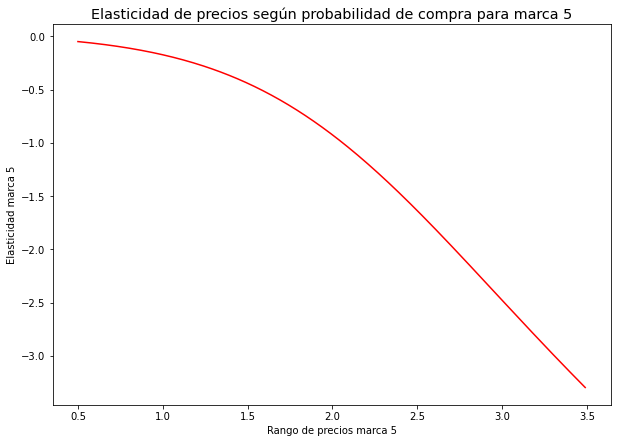

In [16]:
fif, ax = plt.subplots(figsize = (10,7))
plt.style.use("ggplot")

ax.set_title("Elasticidad de precios según probabilidad de compra para marca 5")
ax.set_xlabel("Rango de precios marca 5")
ax.set_ylabel("Elasticidad marca 5")
ax.plot(elasticidad_precios_master["Precio propuesto"], elasticidad_precios_master["Elasticidad M5"], color = "r")
plt.show()


### Elasticidad de precio cruzada

Vamos a comparar la elasticidad cruzada entre la marca 5 y la 4. Podemos asumir, dado el precio, de que la marca 5 es la de mejor calidad y por ende, quien le sigue es la marca 4.

Debemos tener en cuenta que la elasticidad cruzada en este caso, mide la probabilidad de compra o selección de la marca 5 cuando el precio de la marca 4 cambia. Por lo tanto, debemos examinar cambios de precio en la marca 4. Por lo tanto, vamos a crear un nuevo dataframe donde vamos a dejar valores constantes en los precios de las marcas 1, 2, 3 y 5 y utilizaremos el rango de precios creados anteriormente para la columna de precios de la marca 4.

In [17]:
df_m5_cross_m4 = pd.DataFrame(index = np.arange(rango_precios.size))
df_m5_cross_m4["Price_1"] = df_compras_incidencia["Price_1"].mean()
df_m5_cross_m4["Price_2"] = df_compras_incidencia["Price_2"].mean()
df_m5_cross_m4["Price_3"] = df_compras_incidencia["Price_3"].mean()
df_m5_cross_m4["Price_4"] = rango_precios
df_m5_cross_m4["Price_5"] = df_compras_incidencia["Price_5"].mean()

Ahora vamos a obtener las probabilidades de compra usando el modelo.

In [18]:
prob_compra_m5_cross_m4 = lr_predictor_marca.predict_proba(df_m5_cross_m4)
prob_compra_m5_cross_m4[:5]

array([[0.00996306, 0.16384114, 0.00386855, 0.60919494, 0.21313231],
       [0.01011837, 0.16488702, 0.00394205, 0.60674127, 0.2143113 ],
       [0.01027581, 0.1659351 , 0.00401684, 0.60428123, 0.21549102],
       [0.01043543, 0.16698534, 0.00409294, 0.60181491, 0.21667138],
       [0.01059723, 0.16803768, 0.00417036, 0.59934242, 0.21785231]])

#### Importante

Para calcular la elasticidad cruzada vamos a usar una fórmula diferente a la que hemos usado antes. La ecuación para calcular elasticidad cruzada es la siguiente,

$$ E_{cruzada} = -\beta_{precio marca propia} \times precio(marca cruzada) \times P(marca cruzada)$$

Donde,

- $P(marca cruzada)$: Es la probabilidad de selección de la marca 4 ante los cambios de precios.
- $Precio(marca cruzada)$: Es el precio de la marca cruzada, en este caso también la marca 4. 

In [19]:
prob_compra_m4 = prob_compra_m5_cross_m4[:,3]
m4_elasticidad_cruzada = -beta_m5*rango_precios*prob_compra_m4
m4_elasticidad_cruzada[:10]

array([0.33201124, 0.33728747, 0.3425066 , 0.34766847, 0.35277295,
       0.35781988, 0.36280913, 0.36774056, 0.37261406, 0.3774295 ])

Agregamos esta info en nuestro dataframe maestro.

In [20]:
elasticidad_precios_master["M5_cross_M4"] = m4_elasticidad_cruzada
elasticidad_precios_master.head()

,Precio propuesto,Elasticidad M5,M5_cross_M4
0,0.50,-0.049055,0.332011
1,0.51,-0.050616,0.337287
2,0.52,-0.052206,0.342507
3,0.53,-0.053826,0.347668
4,0.54,-0.055477,0.352773


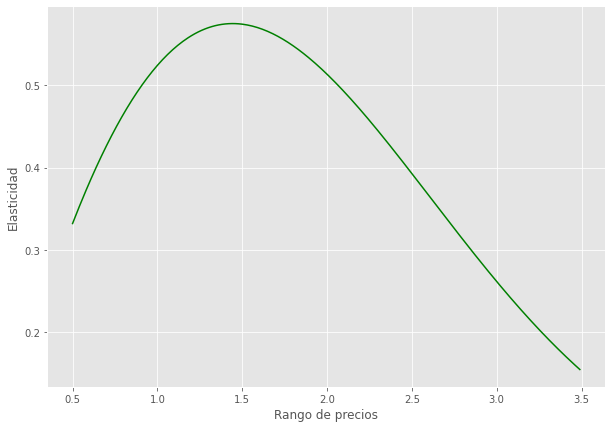

In [21]:
## Graficamos
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title = ("Elasticidad de precios para marca 5 respecto de la marca 4")
ax.set_xlabel("Rango de precios")
ax.set_ylabel("Elasticidad")
ax.plot(elasticidad_precios_master["Precio propuesto"], elasticidad_precios_master["M5_cross_M4"], color = "g")
plt.show()

Podemos ver que a medida que el precio de la marca 4 aumenta, la probabilidad de compra de la marca 5 aumenta. Esto no debería sorprendernos.

Ahora bien, los valores de elasticidad cruzada pueden darnos ideas de cómo se encuentra el mercado de barras de chocolate para el público que estamos analizando.

- Si el valor de la elasticidad cruzada es mayor a cero, se considera que los dos productos son *sustitutos* entre si.
$$ E(marca~cruzada)  >0 ~ sustitutas$$

Esto tiene sentido ya que los productos que estamos comparando son barras de chocolate. Ahora bien, podríamos estar comparando barras de chocolate con vino y en ese caso, la elasticidad cruzada no necesariamente nos daría valores positivos.

- Si el valor absoluto de la elasticidad cruzada, supera en algún punto al valor absoluto de la elasticidad de la propia marca bajo estudio, entonces se considera que la marca alternativa es una **fuerte candidata** a sustituir a la marca bajo análisis.

$$ |E(marca~cruzada)| > |E(marca~bajo~estudio)| ~ Marca alternativa fuerte sustituta $$

*¿Podemos decir que la marca 4 es una candidata a sustituir la marca 5?* Eso dependerá del precio que estemos evaluando.

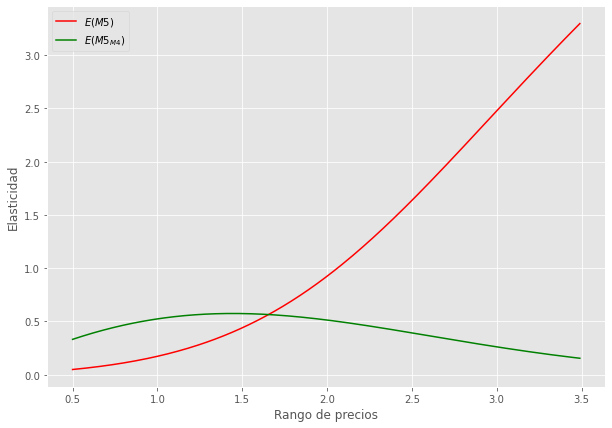

In [22]:
## Graficamos
fig, ax = plt.subplots(figsize = (10,7))
ax.set_title = ("Elasticidad de precios")
ax.set_xlabel("Rango de precios")
ax.set_ylabel("Elasticidad")
ax.plot(elasticidad_precios_master["Precio propuesto"], np.abs(elasticidad_precios_master["Elasticidad M5"].values), color = "r", label = "$E(M5)$")
ax.plot(elasticidad_precios_master["Precio propuesto"], np.abs(elasticidad_precios_master["M5_cross_M4"].values), color = "g", label = "$E(M5_{M4})$")
plt.legend()
plt.show()

Podemos decir que la marca 4 es una fuerte sustituta de la marca 5 para todo el rango de precios desde 0.5 hasta poco más de 1.5 (según se ve en el gráfico anterior).

Si volvemos a analizar los valores medios de precios para las diferentes marcas podremos notar que la marca 4 está en el rango de 1,76USD y el de 2.26USD. Considerando la gráfica de elasticidad cruzada de la marca 5 respecto de la marca 4, podremos notar que la elasticidad es decrece lentamente, no obastante, sigue siendo positiva, indicando que la probabilidad de compra de la marca 5 sigue creciendo con el incremento de precio en la marca 4 pero a una velocidad menor.

Entonces, podríamos pensar en generar estrategias de venta de la marca 5 para intentar captar clientes que compran la marca 4, ya que, como podemos ver, la marca 4 en el rango de precios que actualmente maneja, estaría dentro del rango de *sustituto débil*.

De algo estamos seguros, ninguna marca hará feliz a todos los clientes, no obstante, podríamos intentar lograr que una marca intente hacer feliz a un segmento en particular.

A continuación, vamos a mejorar el modelo para observar la elasticidad pero por segmentos de clientes.

### Análisis de elasticidad propia y elasticidad cruzada para la marca 5 evaluada para el segmento 3

Analizaremos primero el segmento *acomodados*. Sabemos que es el que mayormente compra la marca 4 (ver la notebook *analizandoCompras*).

Utilizaremos el dataframe con los segmentos encontrados luego de haber aplicado Kmeans+PCA a los datos dentro de *purchase_data.csv*.

In [23]:
purchase_data_segmentado = pd.read_csv("datasets/purchase_data_segmentado.csv") #cargamos archivo
purchase_data_segmentado = purchase_data_segmentado[purchase_data_segmentado["Incidence"] == 1] #sólo nos quedamos con las observaciones que hayan tendio una compra
purchase_data_segmentado = purchase_data_segmentado[purchase_data_segmentado["Segmento"] == 3] #nos quedamos con el segmento 3, o "acomodados"
purchase_data_segmentado.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segmento
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,0,0,1,1,52,2,159052,2,1,3
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,1,0,1,1,52,2,159052,2,1,3
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,0,0,1,1,52,2,159052,2,1,3
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,1,0,1,1,52,2,159052,2,1,3
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,1,0,1,1,52,2,159052,2,1,3


In [24]:
Y = purchase_data_segmentado["Brand"]
# pd.get_dummies(purchase_data_segmentado, columns=["Brand"], prefix="Brand", prefix_sep="_")
X = purchase_data_segmentado[features]

lr_segmento3 = LogisticRegression(solver = "sag", multi_class = "multinomial", max_iter = 300)
lr_segmento3.fit(X, Y)

#Tabla de coeficientes para segmento 3
bc_coef_s3 = pd.DataFrame(lr_segmento3.coef_.T)
bc_coef_s3.columns = [coeficientes]
bc_coef_s3.index = [precios]
bc_coef_s3 = bc_coef_s3.round(2)
bc_coef_s3

,CM1,CM2,CM3,CM4,CM5
P1,-2.15,1.33,0.82,0.12,-0.11
P2,-0.96,-1.38,1.29,0.78,0.27
P3,2.01,-1.65,-0.49,0.03,0.11
P4,2.52,0.96,-0.25,-1.90,-1.33
P5,-0.99,-0.30,1.17,0.56,-0.44


#### Elasticidad en precio para marca 5 consigo misma (own brand)

In [25]:
df_m5_s3 = pd.DataFrame(index = np.arange(rango_precios.size))
df_m5_s3["Price_1"] = purchase_data_segmentado["Price_1"].mean()
df_m5_s3["Price_2"] = purchase_data_segmentado["Price_2"].mean()
df_m5_s3["Price_3"] = purchase_data_segmentado["Price_3"].mean()
df_m5_s3["Price_4"] = purchase_data_segmentado["Price_4"].mean()
df_m5_s3["Price_5"] = rango_precios

#predecimos probabilidades
predicciones_s3 = lr_segmento3.predict_proba(df_m5_s3) #probabilidades de selección para la marca 5, segmento 3
prob_compra_m5_s3 = predicciones_s3[:,4]
# prob_compra_m5_s3[:10]

# beta_m5_s3 = bc_coef_s3.iloc[4,4]

m5_s3_elasticidad_propia = beta_m5*rango_precios*(1-prob_compra_m5_s3)
elasticidad_precios_master["M5 S3"] = m5_s3_elasticidad_propia

#### Elasticidad cruzada - Marca 5 respecto de marca 4 para **segmento 3**

In [26]:
df_m5_cross_m4_s3 = pd.DataFrame(index = np.arange(rango_precios.size))
df_m5_cross_m4_s3["Price_1"] = purchase_data_segmentado["Price_1"].mean()
df_m5_cross_m4_s3["Price_2"] = purchase_data_segmentado["Price_2"].mean()
df_m5_cross_m4_s3["Price_3"] = purchase_data_segmentado["Price_3"].mean()
df_m5_cross_m4_s3["Price_4"] = rango_precios
df_m5_cross_m4_s3["Price_5"] = purchase_data_segmentado["Price_5"].mean()

#predecimos probabilidades
predicciones_m5_cross_m4_s3 = lr_segmento3.predict_proba(df_m5_cross_m4_s3) #probabilidades de selección para la marca 4, segmento 3
prob_compra_m5_cross_m4_s3 = predicciones_m5_cross_m4_s3[:,3]
# prob_compra_m5_s3[:10]

elasticidad_m5_cross_m4_s3 = -beta_m5*rango_precios*prob_compra_m5_cross_m4_s3
# elasticidad_m5_cross_m4_s3[:10]

elasticidad_precios_master["M5_cross_M4_S3"] = elasticidad_m5_cross_m4_s3

In [27]:
elasticidad_precios_master

,Precio propuesto,Elasticidad M5,M5_cross_M4,M5 S3,M5_cross_M4_S3
0,0.50,-0.049055,0.332011,-0.297331,0.482421
1,0.51,-0.050616,0.337287,-0.303377,0.491726
2,0.52,-0.052206,0.342507,-0.309434,0.501016
3,0.53,-0.053826,0.347668,-0.315501,0.510290
4,0.54,-0.055477,0.352773,-0.321579,0.519548
...,...,...,...,...,...
295,3.45,-3.231572,0.162235,-3.337314,0.157493
296,3.46,-3.247765,0.160335,-3.350644,0.152071
297,3.47,-3.263927,0.158449,-3.363971,0.146815
298,3.48,-3.280057,0.156578,-3.377295,0.141719


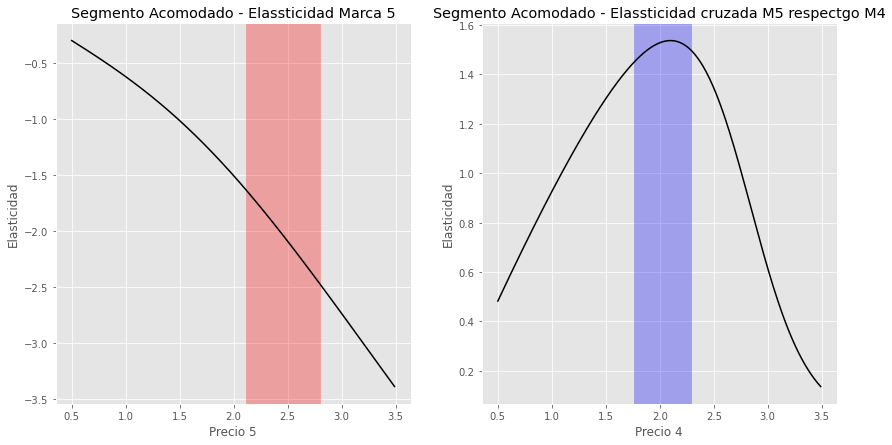

In [28]:
fig, ax = plt.subplots(1,2,figsize = (14,7))
plt.style.use("ggplot")

ax[0].set_title("Segmento Acomodado - Elassticidad Marca 5")
ax[0].set_xlabel("Precio 5")
ax[0].set_ylabel("Elasticidad")
ax[0].plot(rango_precios, elasticidad_precios_master["M5 S3"], color = "k")
ax[0].axvspan(2.11, 2.8, color='red', alpha=0.3)

ax[1].set_title("Segmento Acomodado - Elassticidad cruzada M5 respectgo M4")
ax[1].set_xlabel("Precio 4")
ax[1].set_ylabel("Elasticidad")
ax[1].plot(rango_precios, elasticidad_precios_master["M5_cross_M4_S3"], color = "k")
ax[1].axvspan(1.76, 2.29, color='blue', alpha=0.3)

plt.show()


NOTA: Debemos tener en cuenta que los precios en los ejes x de los gráficos representan los cambios en los precios para la marca 5 y marca 4, respectivamente.

Recordemos que,

- Rango de precios marca 5: entre 2.11USD y 2.8USD
- Rango de precios marca 4: entre 1.76USD y 2.29USD

Estos rangos están marcados en los gráficos anteriores.

**Elasticidad marca 5 consigo misma**
Según la gráfica de la izquierda, en el rango de precios de la marca 5, el segmento de *acomodados* es elástico respecto a la marca (own brand). Esto es esperable, ya que como vimos, este segmente se inclina mayoritariamente por la marca 4, por lo tanto, aumentos de precios en la marca 5 haría que la probabilidad de selección de la marca 5 sea aún menor.

**Elasticidad cruzada de marca 5 respecto marca 4 - segmento 3**
Podemos ver que la elasticidad cruzada para el segmento 3 son todos valores positivos, por ende, la marca 4 es claramente una sustituta de la marca 5.

### Cambios de precios en la marca competidora

¿Qué pasaría si la competencia decrementa el precio de las barras de chocolate de marca 4 en $1\%$?

Podemos determinar si la probabilidad, de que el segmento de *acomodados* compre o no la marca 5, aumentará o disminuirá con este decremento de precio.

Veamos esto con un ejemplo, supongamos un precio para la marca 4 es 2USD. Necesitamos saber qué valor tiene la columna *M5_cross_M4_S3* referente a los valores de elasticidad cruzada de la marca 5 respecto de la marca 4.

In [29]:
elasticidad_precios_master.loc[150]

Precio propuesto    2.000000
Elasticidad M5     -0.924586
M5_cross_M4         0.513361
M5 S3              -1.505517
M5_cross_M4_S3      1.527730
Name: 150, dtype: float64

Podemos ver que para un precio de 2USD, la elasticidad cruzada *M5_cross_M4_S3* es de $1.52$. Por lo tanto, si el precio de la marca 4 cae en $1\%$, la probabilidad de que el segmento de personas *acomodadas* compre la marca 5 **¡decaerá en 1.5%!**.

¿Qué hacemos entonces? Podríamos también decrementar el precio de nuestro producto en $1\%$. ¿Cómo impactaría esto en la probabilidad de compra del segmento 3 en la marca 5?

Veamos qué valor posee la elasticidad para los 2USD en los valores de elasticidad de la marca 5.

In [30]:
elasticidad_precios_master.loc[189:192]

,Precio propuesto,Elasticidad M5,M5_cross_M4,M5 S3,M5_cross_M4_S3
189,2.39,-1.463606,0.421704,-1.955974,1.440504
190,2.40,-1.478977,0.419101,-1.968160,1.433270
191,2.41,-1.494412,0.416491,-1.980373,1.425748
192,2.42,-1.509910,0.413873,-1.992613,1.417938
